In [1]:
import numpy as np
import pandas as pd
import quantstats as qs
import pypfopt
from pypfopt import plotting
import sklearn 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import ffn

## Data processing

In [2]:
df_industry_indices = pd.read_csv('30_Industry_Portfolios_Daily.csv')#, dtype=np.float64)
df_industry_indices

,Date,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,19260701,-0.22,-0.74,0.00,0.29,-0.55,-0.59,-0.37,1.43,-0.32,...,-0.06,1.57,-0.23,-0.25,0.28,1.50,-0.13,-0.22,0.83,-0.75
1,19260702,0.18,0.09,0.50,0.36,0.78,0.17,-0.26,0.08,0.80,...,0.37,-1.18,0.03,0.25,-0.44,0.00,-0.06,-0.86,0.23,2.47
2,19260706,-0.20,-0.25,0.63,-0.06,2.60,-0.28,0.25,0.51,0.81,...,0.04,-0.14,0.75,0.95,0.16,0.42,0.17,-0.33,0.42,0.66
3,19260707,-0.29,-2.02,-0.65,0.03,-1.90,-0.06,-0.33,0.55,0.67,...,-0.33,0.79,-0.47,1.05,-0.03,-7.24,-0.41,-1.22,-0.67,0.41
4,19260708,1.01,-0.08,0.93,-0.08,0.00,0.18,-0.26,0.66,0.05,...,0.87,-0.26,1.34,-0.48,0.16,2.56,-0.29,-0.04,-0.50,-0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,20250523,0.15,-0.60,-2.23,-0.05,-0.44,-1.11,-2.30,-0.38,0.44,...,0.00,-0.93,-0.78,-0.58,-0.92,-0.68,-1.00,-0.47,-0.47,0.91
25999,20250527,1.45,-0.32,-1.25,3.37,2.03,2.45,4.37,1.05,3.17,...,2.23,3.52,2.65,1.83,3.54,2.52,2.73,2.54,1.85,2.13
26000,20250528,-0.84,-2.56,-1.91,-0.66,-0.51,-1.39,-1.05,0.23,-1.67,...,-0.52,-0.59,-0.79,-2.18,-0.52,-1.15,-1.06,-0.17,-1.04,-0.54
26001,20250529,0.70,0.89,-0.38,-0.49,-0.01,1.09,-0.58,1.53,0.10,...,-0.25,0.40,1.33,0.49,1.19,0.64,-0.07,-0.55,0.59,-0.92


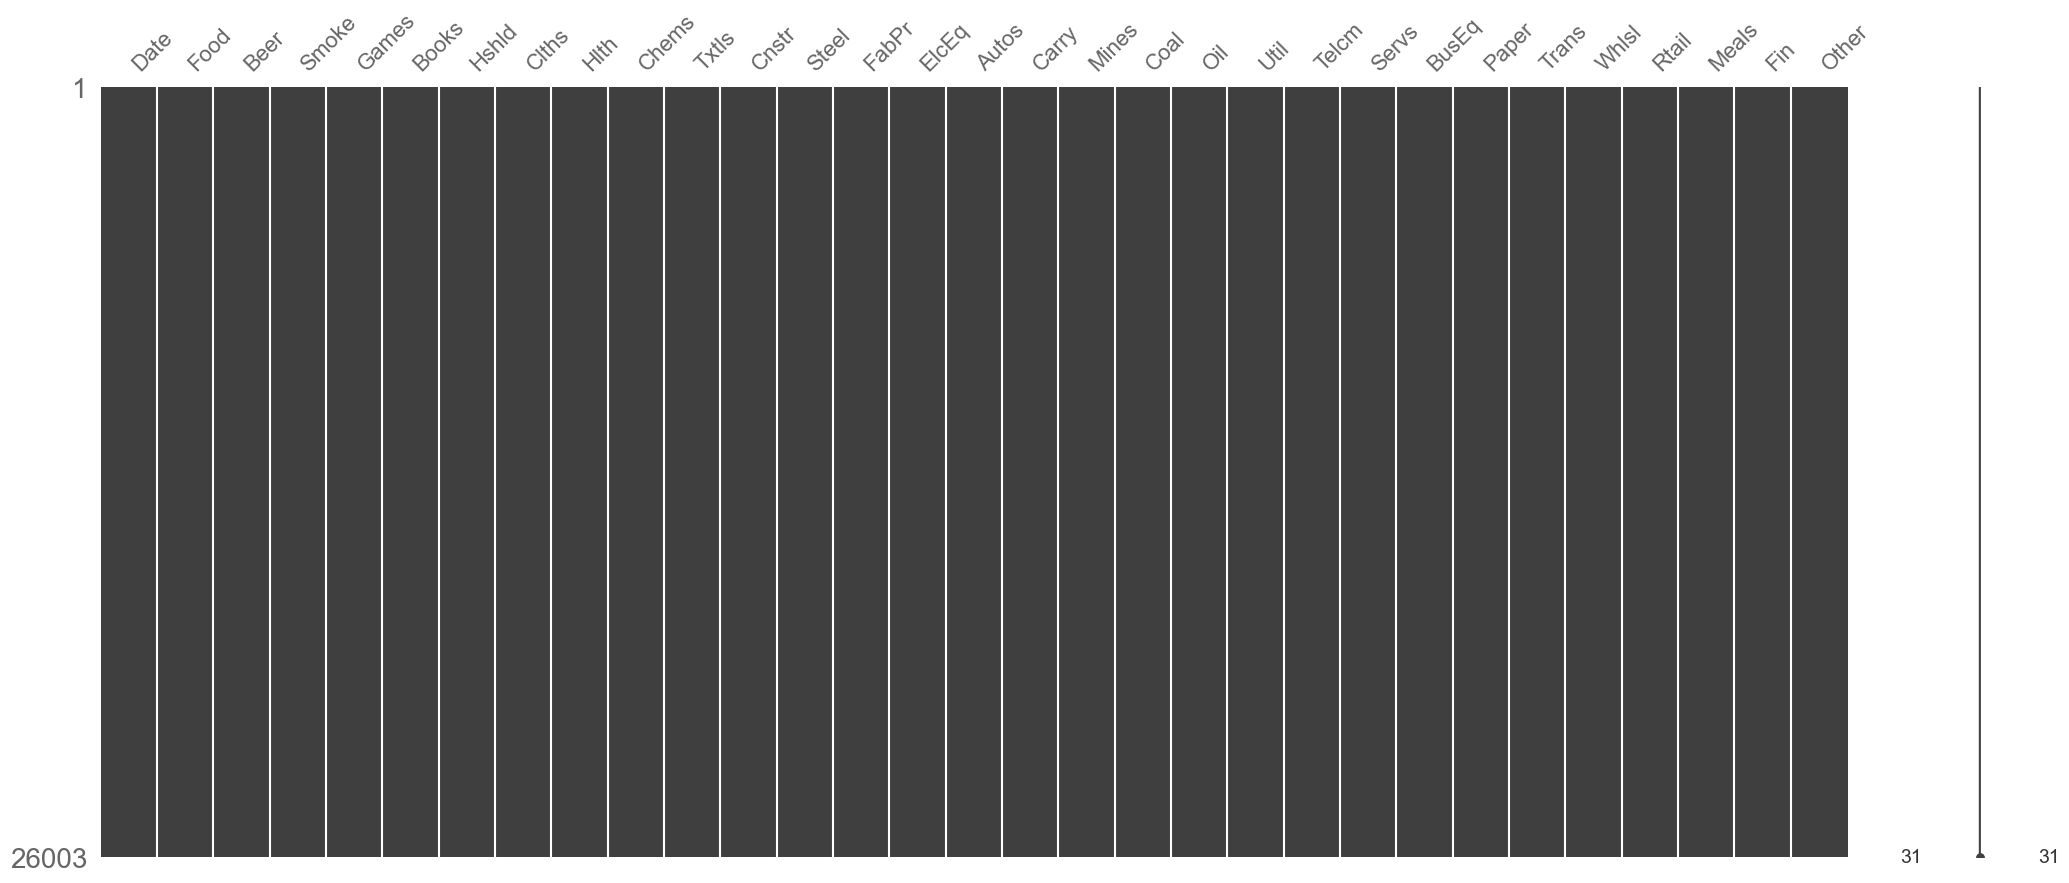

In [3]:
msno.matrix(df_industry_indices)
plt.show()

In [4]:
df_industry_indices['Date'] = pd.to_datetime(df_industry_indices['Date'], format = "%Y%m%d")
df_industry_indices = df_industry_indices.set_index('Date')
df_industry_indices

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-01,-0.22,-0.74,0.00,0.29,-0.55,-0.59,-0.37,1.43,-0.32,4.02,...,-0.06,1.57,-0.23,-0.25,0.28,1.50,-0.13,-0.22,0.83,-0.75
1926-07-02,0.18,0.09,0.50,0.36,0.78,0.17,-0.26,0.08,0.80,-1.25,...,0.37,-1.18,0.03,0.25,-0.44,0.00,-0.06,-0.86,0.23,2.47
1926-07-06,-0.20,-0.25,0.63,-0.06,2.60,-0.28,0.25,0.51,0.81,-0.53,...,0.04,-0.14,0.75,0.95,0.16,0.42,0.17,-0.33,0.42,0.66
1926-07-07,-0.29,-2.02,-0.65,0.03,-1.90,-0.06,-0.33,0.55,0.67,0.98,...,-0.33,0.79,-0.47,1.05,-0.03,-7.24,-0.41,-1.22,-0.67,0.41
1926-07-08,1.01,-0.08,0.93,-0.08,0.00,0.18,-0.26,0.66,0.05,2.01,...,0.87,-0.26,1.34,-0.48,0.16,2.56,-0.29,-0.04,-0.50,-0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,0.15,-0.60,-2.23,-0.05,-0.44,-1.11,-2.30,-0.38,0.44,-1.04,...,0.00,-0.93,-0.78,-0.58,-0.92,-0.68,-1.00,-0.47,-0.47,0.91
2025-05-27,1.45,-0.32,-1.25,3.37,2.03,2.45,4.37,1.05,3.17,2.49,...,2.23,3.52,2.65,1.83,3.54,2.52,2.73,2.54,1.85,2.13
2025-05-28,-0.84,-2.56,-1.91,-0.66,-0.51,-1.39,-1.05,0.23,-1.67,-0.96,...,-0.52,-0.59,-0.79,-2.18,-0.52,-1.15,-1.06,-0.17,-1.04,-0.54


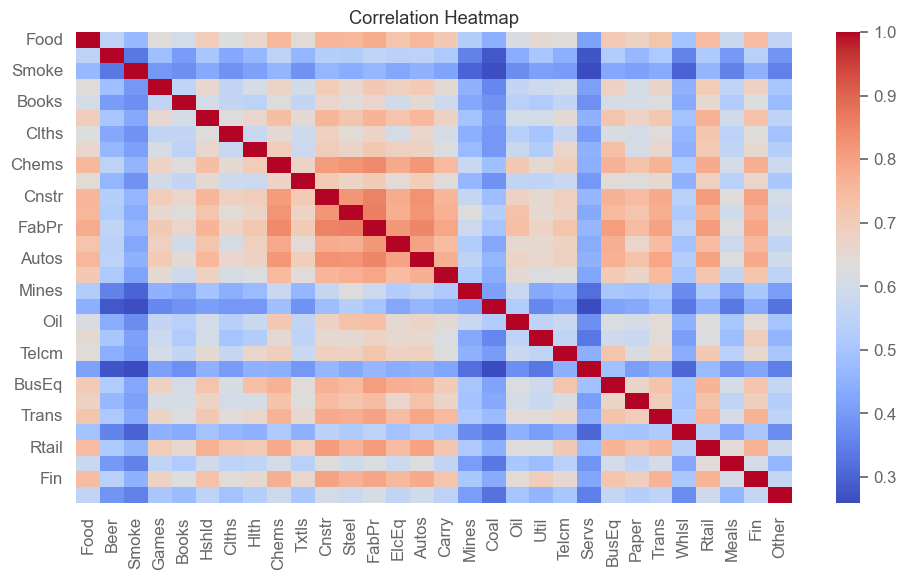

In [5]:
sns.heatmap(df_industry_indices.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

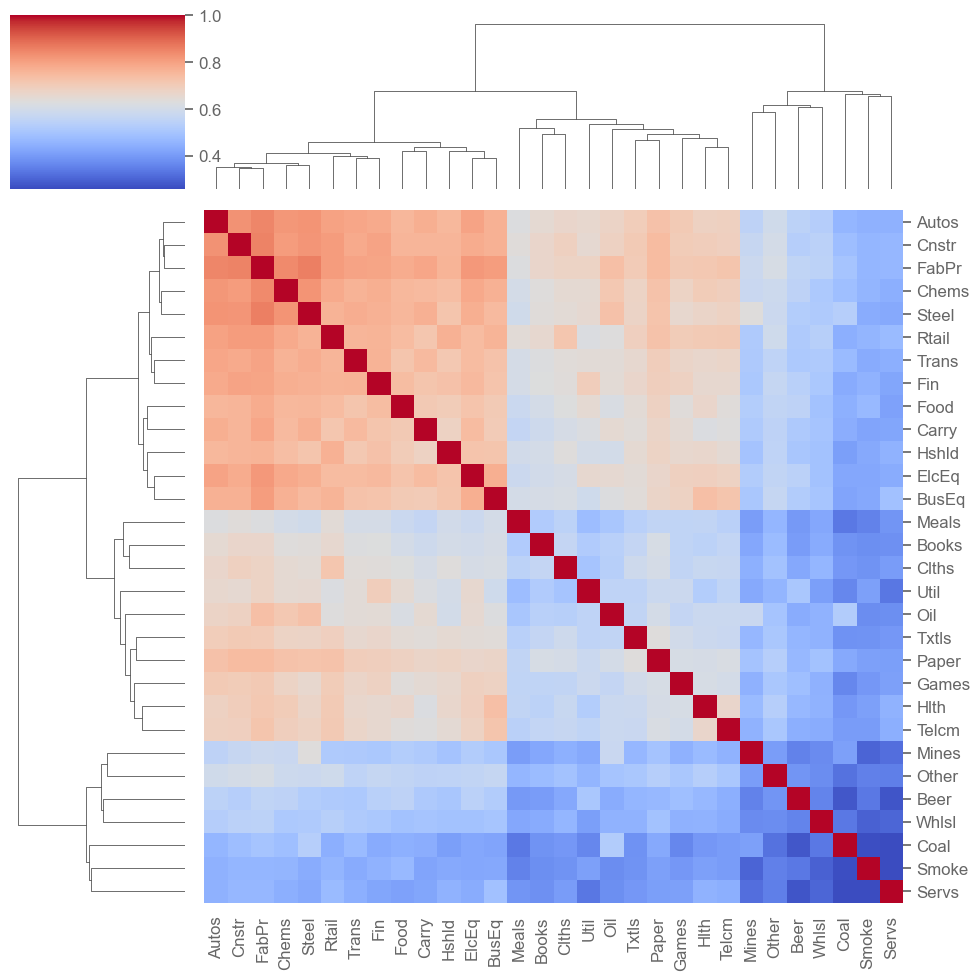

In [6]:
sns.clustermap(df_industry_indices.corr(), method="complete", annot=False, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

<Figure size 300x100 with 0 Axes>

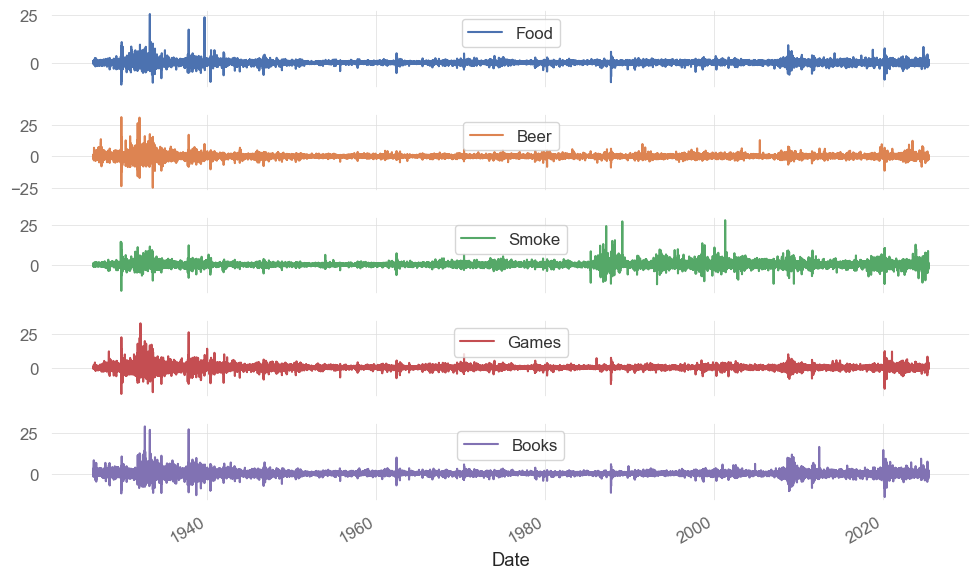

In [7]:
plt.figure(figsize=(3, 1))
df_industry_indices.iloc[:,:5].plot(subplots = True)
plt.tight_layout()
plt.show()

## Define Portfolios

### Inverse Volatility Portfolio

In [8]:
portfolio_ivol = ffn.calc_inv_vol_weights(df_industry_indices).round(2)
portfolio_ivol = portfolio_ivol / sum(portfolio_ivol)

C:\Users\Louis\anaconda3\envs\fin\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Equal Risk Contribution Portfolio

In [9]:
portfolio_erc = ffn.calc_erc_weights(df_industry_indices).round(2)
portfolio_erc = portfolio_erc/ sum(portfolio_erc)

### Markowitz Portfolio

In [10]:
portfolio_mv = ffn.calc_mean_var_weights(df_industry_indices).round(2)
portfolio_mv = portfolio_mv / sum(portfolio_mv)

## Plot Portfolios in Mean-Variance Space

In [11]:
exp_returns = df_industry_indices.mean(axis = 0)
Sigma_indices = sklearn.covariance.ledoit_wolf(df_industry_indices)[0]
def get_return_vol(w):
    r = np.matmul(exp_returns, w)
    vol = np.sqrt(np.matmul(np.matmul(w, Sigma_indices), w))
    return r, vol
def get_returns(w):
    return np.matmul(df_industry_indices, w)

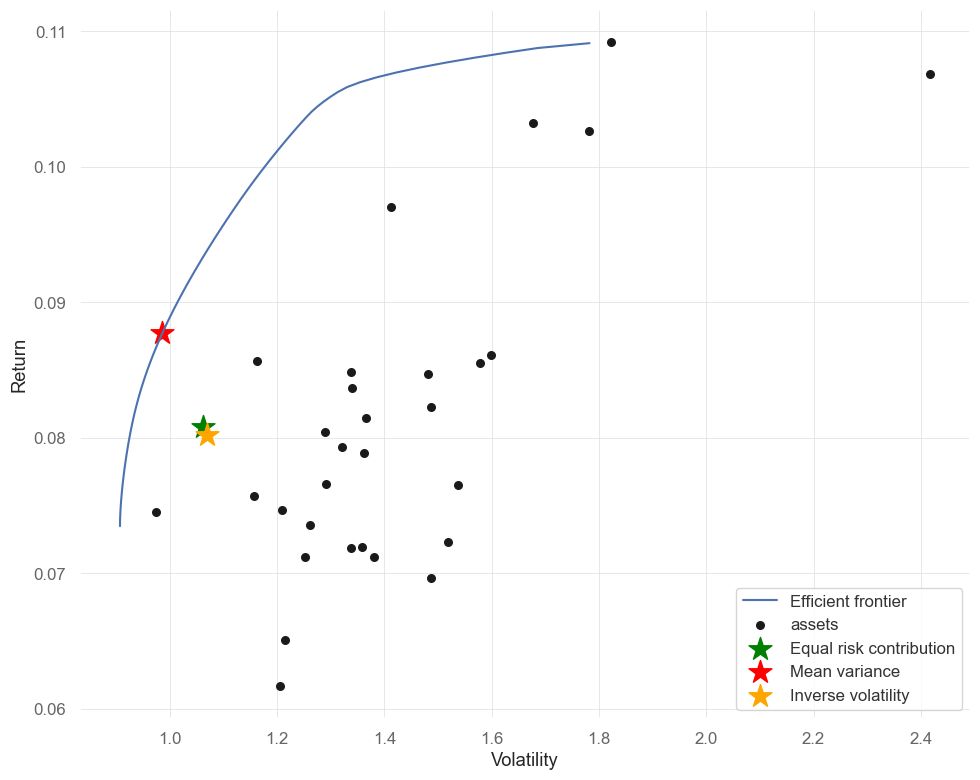

In [18]:
# compute efficient frontier (has to be recomputed for each plot)
asset_ef = pypfopt.efficient_frontier.EfficientFrontier(expected_returns= exp_returns, 
                                                        cov_matrix = df_industry_indices.cov(),#Sigma_indices, 
                                                        weight_bounds = (0, 1), verbose=False, solver='CVXOPT')

fig, ax = plt.subplots(figsize=(10, 8))
pypfopt.plotting.plot_efficient_frontier(asset_ef)

# add erc portfolio
erc_ret, erc_vol = get_return_vol(portfolio_erc)
ax.scatter(erc_vol, erc_ret, marker="*", s=300, c="green", label="Equal risk contribution")

# add mv portfolio
mv_ret, mv_vol = get_return_vol(portfolio_mv)
ax.scatter(mv_vol, mv_ret, marker="*", s=300, c="red", label="Mean variance")

# add inverse vola portfolio
iv_ret, iv_vol = get_return_vol(portfolio_ivol)
ax.scatter(iv_vol, iv_ret, marker="*", s=300, c="orange", label="Inverse volatility")

# display
ax.legend()
#plt.savefig('EfficientFrontier.png')
plt.show()

## Benchmarking

In [81]:
def my_cross_validation(data, func, init = 1000, step = 1, window = None):
    out = None
    for k in range(init,len(data)-1, step):
        if window:
            c_data = data.iloc[k-window:k,:]
        else:
            c_data = data.iloc[:k,:]
        c_res = func(c_data)
        out = pd.concat([out] + [pd.DataFrame(c_res).transpose()]*step, axis=0)
    out = out.iloc[:len(data)-init-1,:]
    out= out.set_index(data.iloc[init+1:,:].index)
    return out

In [82]:
cv_weights = my_cross_validation(df_industry_indices, ffn.calc_mean_var_weights, init = len(df_industry_indices)-5000, step=20, window=1000)

In [83]:
cv_weights

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2005-07-19,1.496991e-01,2.074086e-01,4.412000e-17,0.000000e+00,8.280076e-17,2.246491e-17,0.007892,7.147085e-17,1.316034e-16,4.917694e-17,...,3.168039e-16,9.532848e-17,1.336550e-16,6.890105e-17,2.457073e-17,0.0,1.280172e-16,5.602871e-02,0.3829,0.043395
2005-07-20,1.496991e-01,2.074086e-01,4.412000e-17,0.000000e+00,8.280076e-17,2.246491e-17,0.007892,7.147085e-17,1.316034e-16,4.917694e-17,...,3.168039e-16,9.532848e-17,1.336550e-16,6.890105e-17,2.457073e-17,0.0,1.280172e-16,5.602871e-02,0.3829,0.043395
2005-07-21,1.496991e-01,2.074086e-01,4.412000e-17,0.000000e+00,8.280076e-17,2.246491e-17,0.007892,7.147085e-17,1.316034e-16,4.917694e-17,...,3.168039e-16,9.532848e-17,1.336550e-16,6.890105e-17,2.457073e-17,0.0,1.280172e-16,5.602871e-02,0.3829,0.043395
2005-07-22,1.496991e-01,2.074086e-01,4.412000e-17,0.000000e+00,8.280076e-17,2.246491e-17,0.007892,7.147085e-17,1.316034e-16,4.917694e-17,...,3.168039e-16,9.532848e-17,1.336550e-16,6.890105e-17,2.457073e-17,0.0,1.280172e-16,5.602871e-02,0.3829,0.043395
2005-07-25,1.496991e-01,2.074086e-01,4.412000e-17,0.000000e+00,8.280076e-17,2.246491e-17,0.007892,7.147085e-17,1.316034e-16,4.917694e-17,...,3.168039e-16,9.532848e-17,1.336550e-16,6.890105e-17,2.457073e-17,0.0,1.280172e-16,5.602871e-02,0.3829,0.043395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,1.171468e-17,4.443580e-17,8.663186e-18,1.108269e-17,0.000000e+00,2.168945e-17,0.000000,3.409100e-17,3.047389e-17,0.000000e+00,...,4.533173e-17,0.000000e+00,4.567765e-18,0.000000e+00,3.607572e-17,0.0,0.000000e+00,2.247819e-17,0.0000,0.000000
2025-05-27,1.171468e-17,4.443580e-17,8.663186e-18,1.108269e-17,0.000000e+00,2.168945e-17,0.000000,3.409100e-17,3.047389e-17,0.000000e+00,...,4.533173e-17,0.000000e+00,4.567765e-18,0.000000e+00,3.607572e-17,0.0,0.000000e+00,2.247819e-17,0.0000,0.000000
2025-05-28,1.171468e-17,4.443580e-17,8.663186e-18,1.108269e-17,0.000000e+00,2.168945e-17,0.000000,3.409100e-17,3.047389e-17,0.000000e+00,...,4.533173e-17,0.000000e+00,4.567765e-18,0.000000e+00,3.607572e-17,0.0,0.000000e+00,2.247819e-17,0.0000,0.000000


In [84]:
portfolio_returns = (df_industry_indices.loc[cv_weights.index,:]*cv_weights).sum(axis = 1)

In [85]:
portfolio_returns.name = "Markowitz Portfolio of Industry Indices"
portfolio_returns

Date
2005-07-19    0.743659
2005-07-20    0.351653
2005-07-21   -0.523437
2005-07-22    1.091704
2005-07-25   -0.260505
                ...   
2025-05-23   -0.067042
2025-05-27    2.231676
2025-05-28   -2.207775
2025-05-29    0.206343
2025-05-30   -0.746283
Name: Markowitz Portfolio of Industry Indices, Length: 4999, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2005-07-20   2005-07-20
End Period                 2025-05-30   2025-05-30
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          380.88%      1,195.49%
CAGR﹪                     5.61%        9.31%

Sharpe                     0.5          0.79
Prob. Sharpe Ratio         98.72%       99.97%
Smart Sharpe               0.48         0.75
Sortino                    0.7          1.12
Smart Sortino              0.67         1.06
Sortino/√2                 0.5          0.79
Smart Sortino/√2           0.47         0.75
Omega                      1.16         1.16

Max Drawdown               -56.78%      -38.94%
Max DD Date                2009-03-09   2020-03-23
Max DD Period Start        2007-10-10   2018-09-24
Max DD Period End          2013-03-27   2020-06-04
Longest DD Days            1996         1433


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-09-24,2020-03-23,2020-06-04,620,-38.937820,-34.028466
2,2007-10-11,2009-03-03,2010-03-09,881,-37.675203,-34.242374
3,2021-06-28,2025-04-07,2025-05-30,1433,-36.570278,-32.423767
4,2011-06-01,2011-08-08,2012-02-08,253,-20.704436,-17.971152
5,2010-04-13,2010-06-09,2010-09-17,158,-14.001861,-13.214362


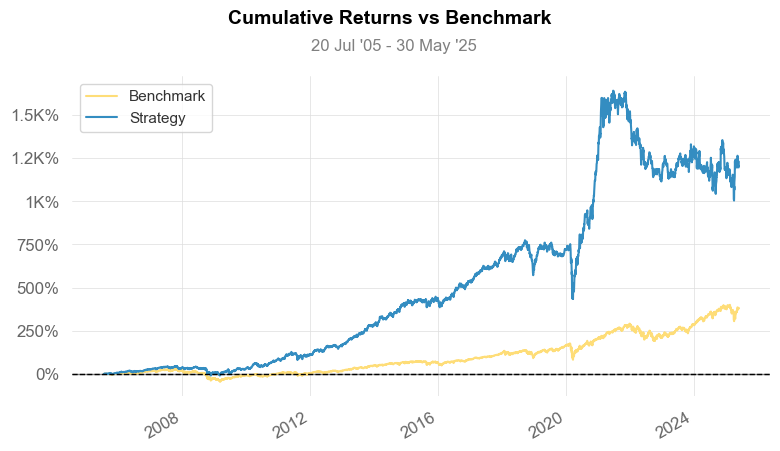

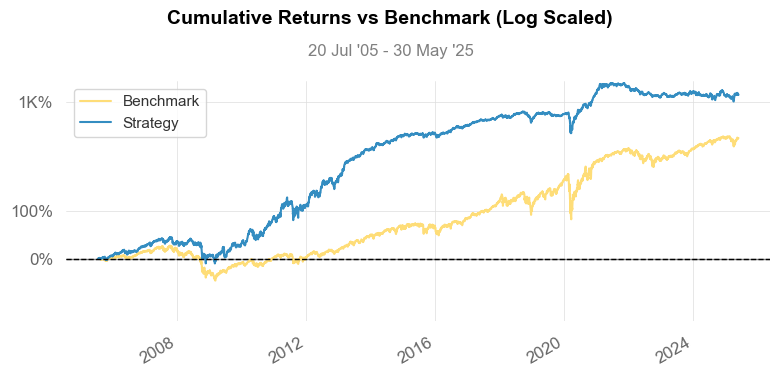

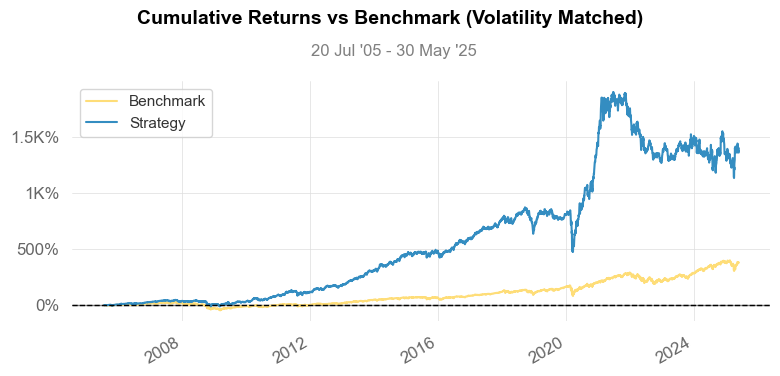

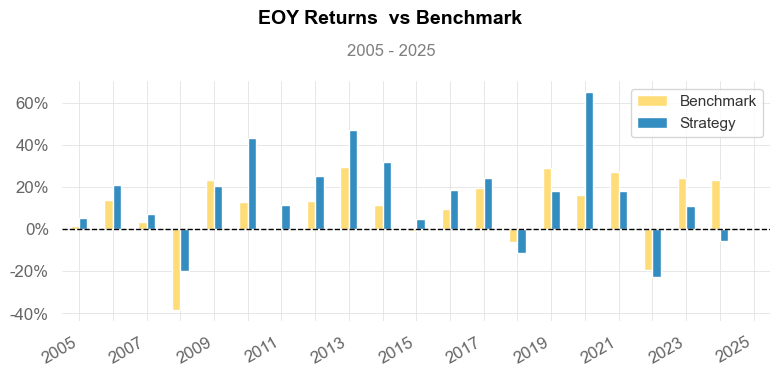

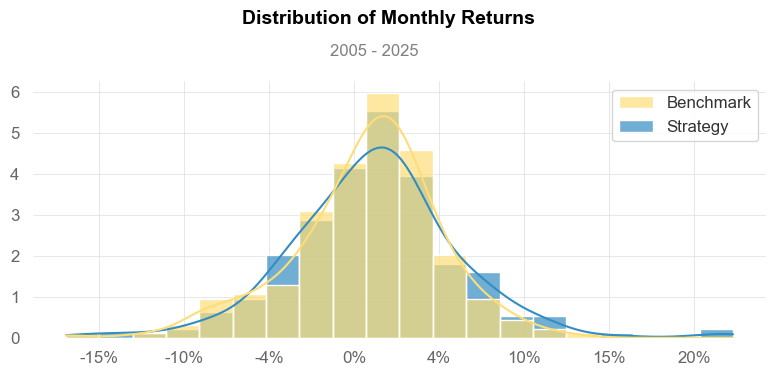

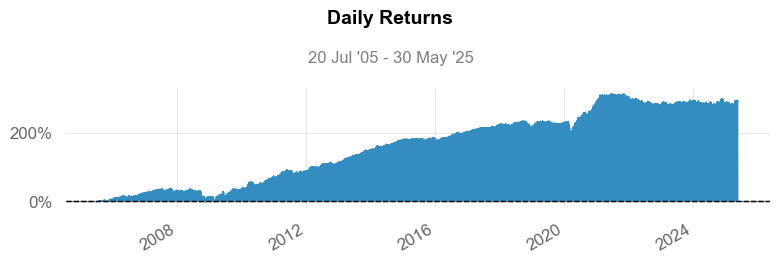

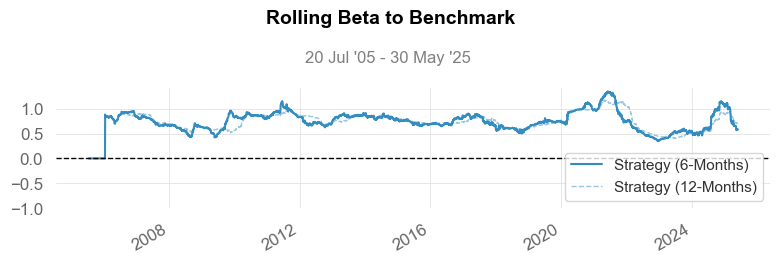

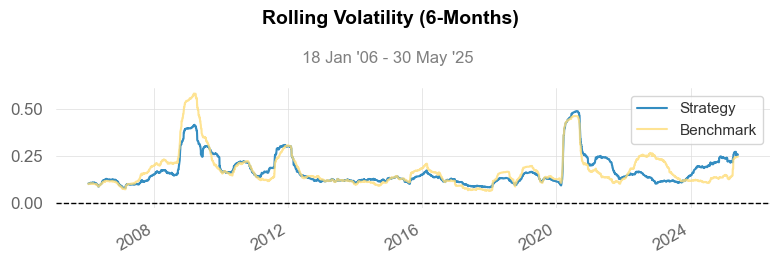

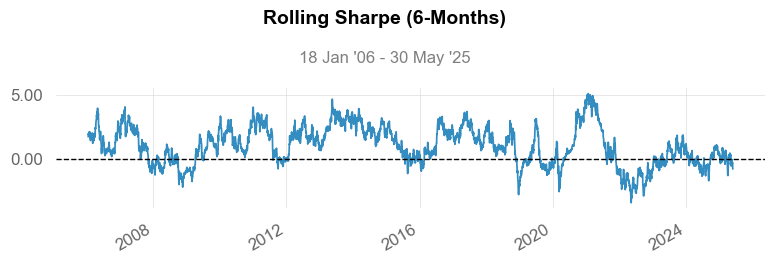

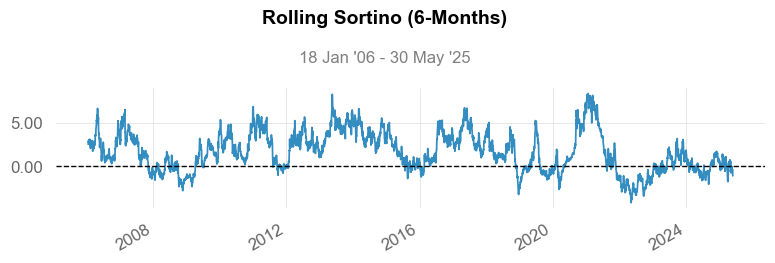

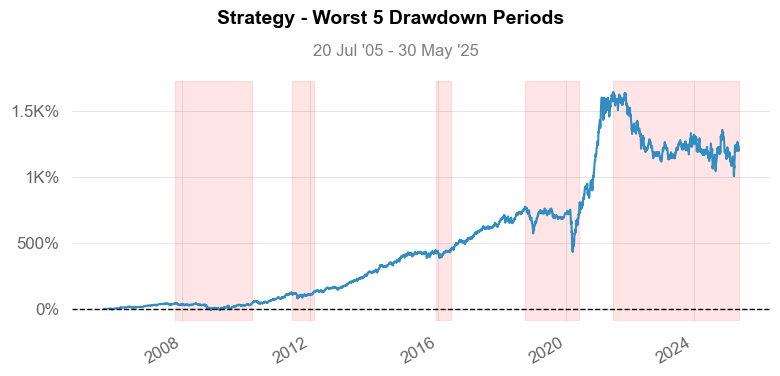

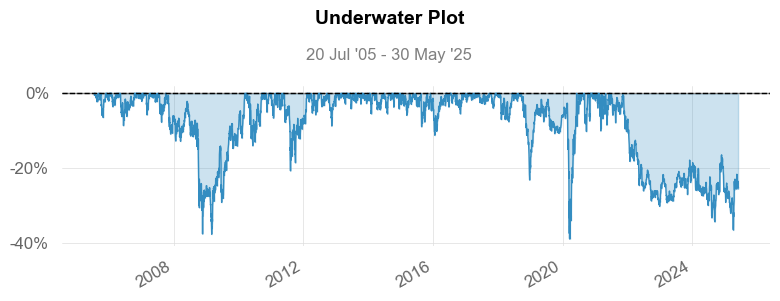

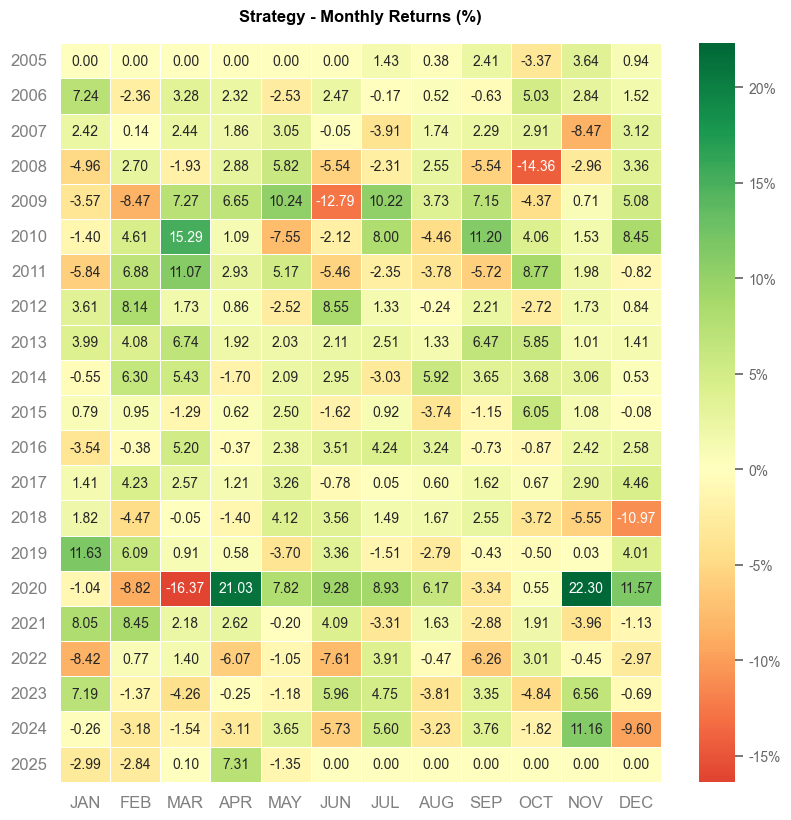

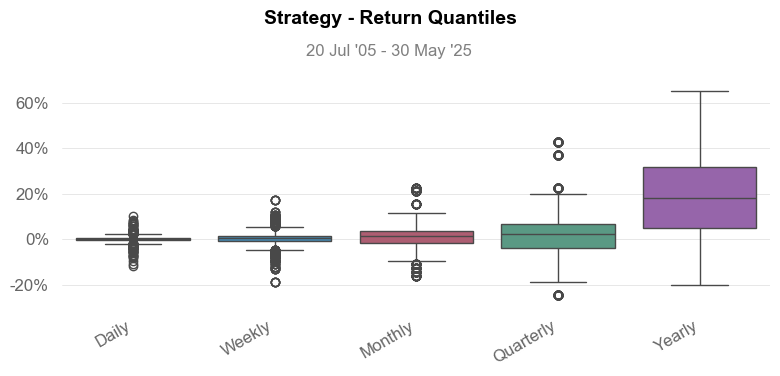

In [86]:
qs.reports.full(portfolio_returns/100, benchmark='^GSPC')

In [87]:
qs.reports.html(portfolio_returns/100, benchmark='^GSPC')